# Guía 4 - Ejercicio 4 
## Imports y definición de funciones
- mostrar_histogramas_hsv: Función que recibe una imagen en BGR y realiza la gráfica del histograma de cada una de sus componentes en HSV.
- segmentar_hsv: Función que recibe una imagen en BGR, un rango de saturación, un rango de hue y genera la segmentación de la imagen en HSV
    - Para ello, convierte la imagen en HSV, la separa por sus componentes y comprueba mediante un encadenamiento de and's lógicos que los valores de hue y saturación se encuentren dentro de los rangos pasados como argumento, luego en base a esto genera la máscara y con esta la segmentación.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mostrar_histogramas_hsv(imagen):
    imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)
    
    h, s, v = cv.split(imagen_hsv)
    
    hist_h = cv.calcHist([h], [0], None, [180], [0, 180])
    hist_s = cv.calcHist([s], [0], None, [256], [0, 256])
    hist_v = cv.calcHist([v], [0], None, [256], [0, 256])
    
    plt.figure(figsize=(8, 6))
    plt.subplot(311)
    plt.plot(hist_h, color='b')
    plt.title('Histograma de Matiz (H)')
    plt.xlabel('Valor de H')
    plt.ylabel('Frecuencia')
    
    plt.subplot(312)
    plt.plot(hist_s, color='g')
    plt.title('Histograma de Saturación (S)')
    plt.xlabel('Valor de S')
    plt.ylabel('Frecuencia')
    
    plt.subplot(313)
    plt.plot(hist_v, color='r')
    plt.title('Histograma de Valor (V)')
    plt.xlabel('Valor de V')
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

def segmentar_hsv(imagen, rango_hue, rango_saturation):
    imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)
    
    h, s, _ = cv.split(imagen_hsv)
    
    mask = np.logical_and(np.logical_and(rango_hue[0] <= h, h <= rango_hue[1]), 
                          np.logical_and(rango_saturation[0] <= s, s <= rango_saturation[1]))
    
    # Aplicar la máscara a la imagen original (en teoría estaría en RGB)
    segmentacion = cv.bitwise_and(imagen, imagen, mask=np.uint8(mask))
    
    return segmentacion


## Primera parte - segmentación en RGB usando una esfera
Lectura y muestra de la imagen original

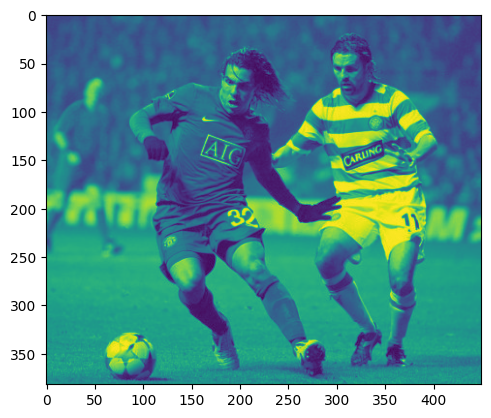

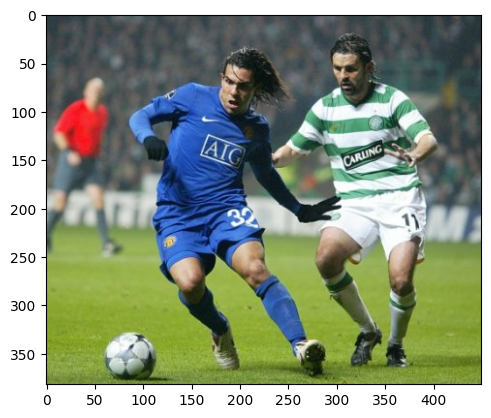

In [12]:
ruta = "Imagenes_Ej/futbol.jpg"        
imagen = cv.imread(ruta)
imagen_gris = cv.cvtColor(imagen,cv.COLOR_BGR2GRAY)
plt.imshow(imagen_gris, cmap='gray')
plt.show()
imagen_rgb = cv.cvtColor(imagen,cv.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.show()

Creación de la esfera para segmentar, se toma un tipo de azul de la camiseta y un radio para permitir una cierta tolerancia. Se calcula en base a esto las distancias de cada pixel dentro de la esfera, los píxeles que se encuentran dentro de este radio se ponen de color rojo, mientras que los que quedan afuera quedan de color verde

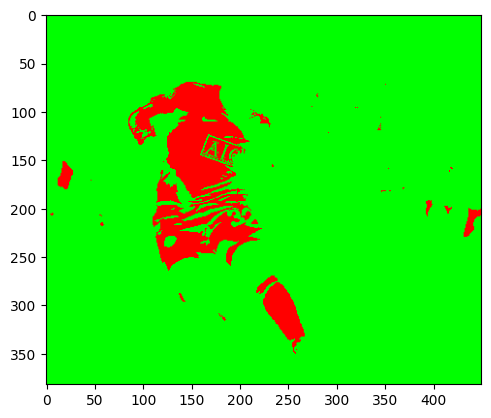

In [4]:
COLOR_ELEGIDO_RGB = [40,92,201]

centroide_rgb = np.array(COLOR_ELEGIDO_RGB)#COLOR ELEGIDO A OJO
radio_rgb = 100

distancias = np.linalg.norm(imagen_rgb - centroide_rgb, axis=-1)


mantener_colores = False #Si se quiere mantener el color original de la imagen y lo demás en negro
if mantener_colores:
    mascara_rgb = np.where(distancias <= radio_rgb, 255, 0).astype(np.uint8) #Donde las distancias sean <= radio 1 sino 0)
    imagen_rgb_segmentada = cv.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_rgb)
else:
    mascara_rgb = np.where(distancias <= radio_rgb, 1, 0).astype(np.uint8)
    color_dentro_radio = (255,0,0)
    color_fuera_radio = (0,255,0)
    imagen_rgb_segmentada = np.where(mascara_rgb[...,None], color_dentro_radio, color_fuera_radio)

plt.imshow(imagen_rgb_segmentada)
plt.show()

## Segunda parte - Segmentación en HSV usando un rectángulo [H,S]
En este caso, observando el histograma se eligió segmentar el césped

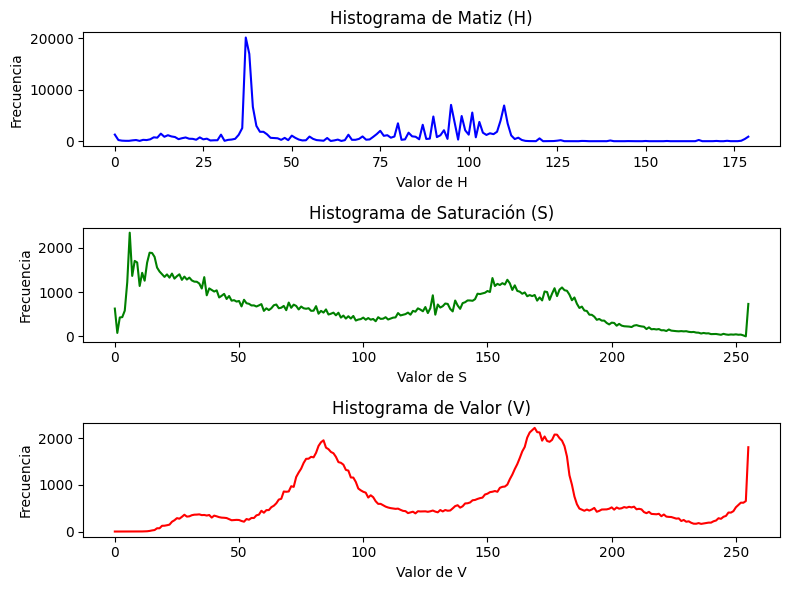

rango_hue:  [25, 50]
rango_saturation:  [100, 210]


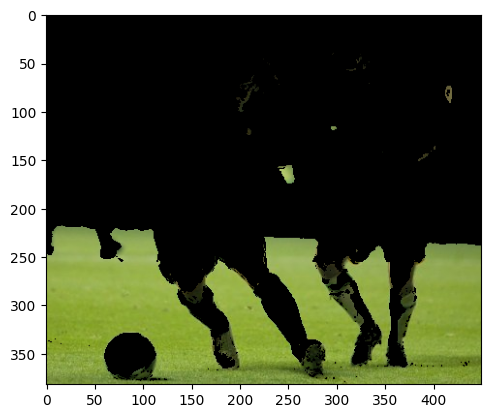

In [5]:
mostrar_histogramas_hsv(imagen)
imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)

rango_hue = [25,50]
rango_saturation = [100,210]
print("rango_hue: ", rango_hue)
print("rango_saturation: ", rango_saturation)

segmentacion = segmentar_hsv(imagen, rango_hue, rango_saturation)
segmentacion_RGB = cv.cvtColor(segmentacion,cv.COLOR_BGR2RGB)
plt.imshow(segmentacion_RGB)
plt.show()

## Tercera parte - Otras imágenes
Primero se observan las imágenes solicitadas

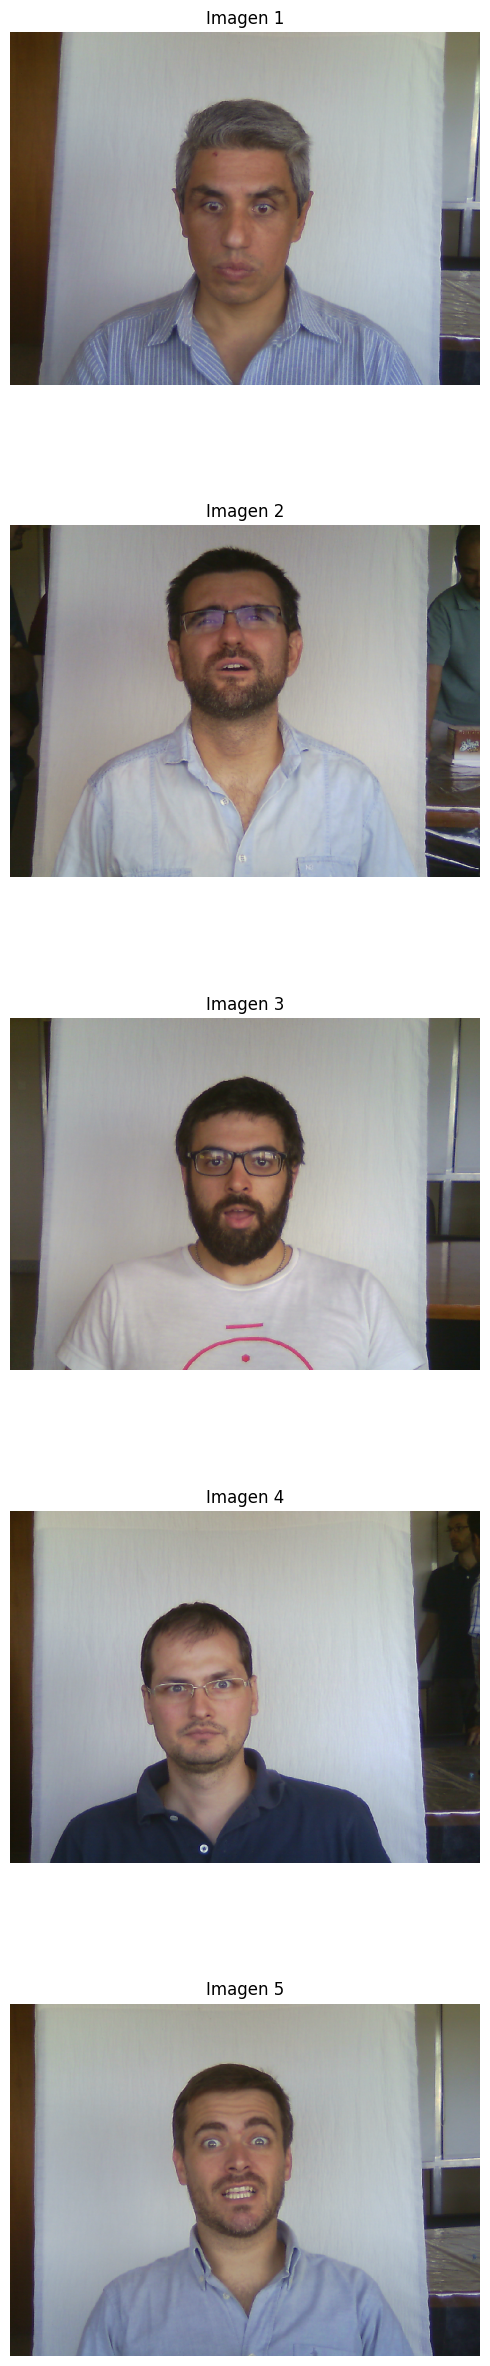

In [6]:
#Lectura 
rutas = ["s01_i08_H_CM.png", "s03_i10_H_DM.png", "s05_i08_H_LB.png","s06_i13_H_LV.png", "s08_i06_H_MA.png"] 
longitud = len(rutas)
fig, axs = plt.subplots(longitud,1, figsize=(5,5*longitud))
imagenes = []
prefijo = "Imagenes_Ej/"
for i,ruta in enumerate(rutas):
    imagen = cv.imread(prefijo+ruta)
    imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)

    axs[i].imshow(imagen_rgb)
    axs[i].axis("off")
    axs[i].set_title('Imagen ' + str(i+1))
    imagenes.append(imagen)
plt.tight_layout()
plt.show()

## Visualización de histogramas de las imágenes

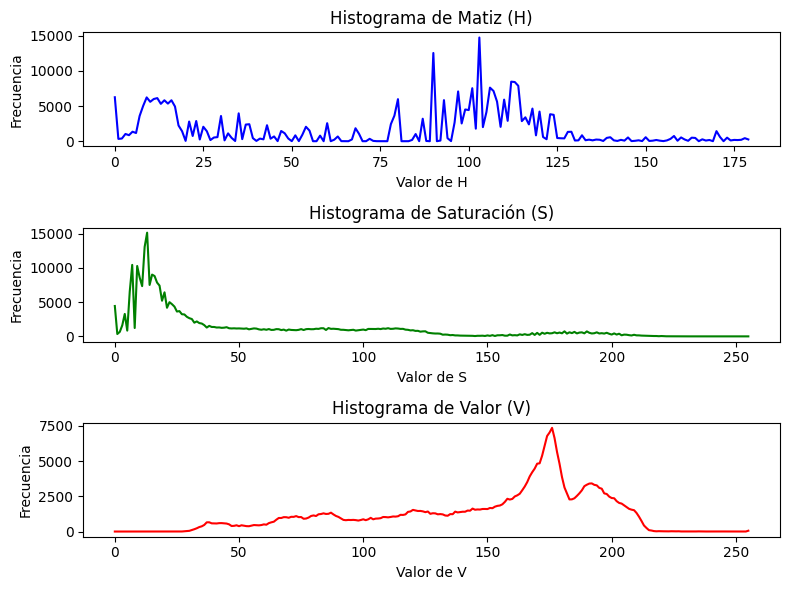

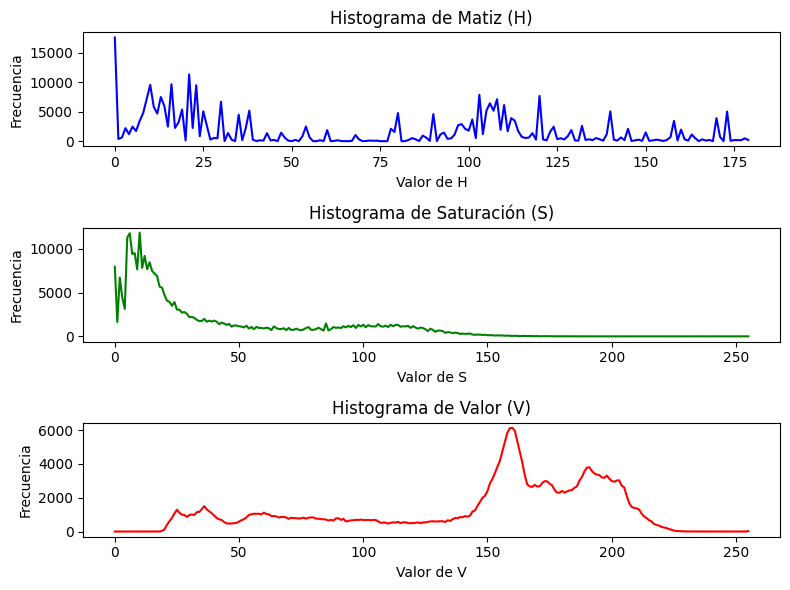

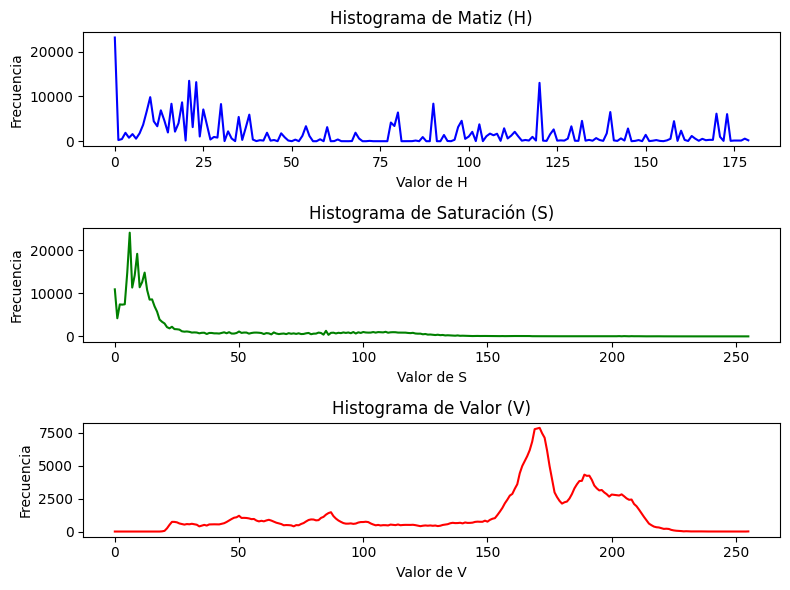

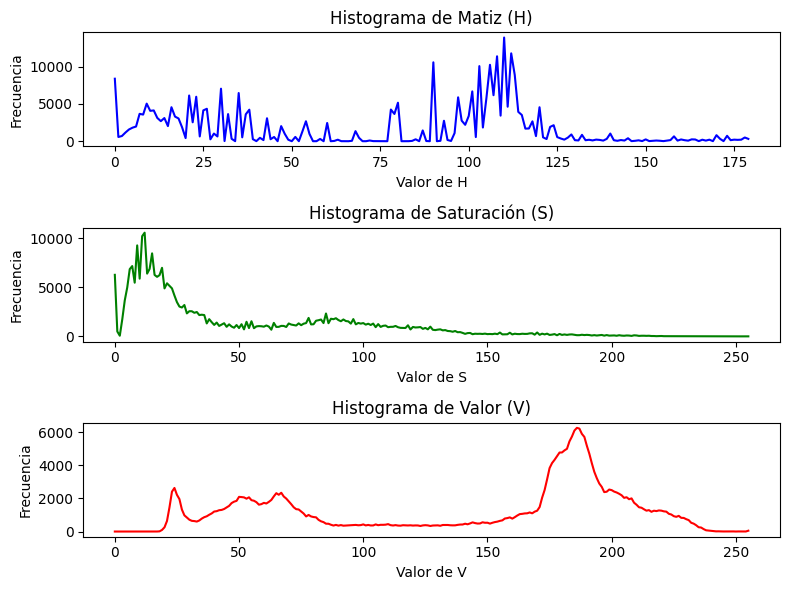

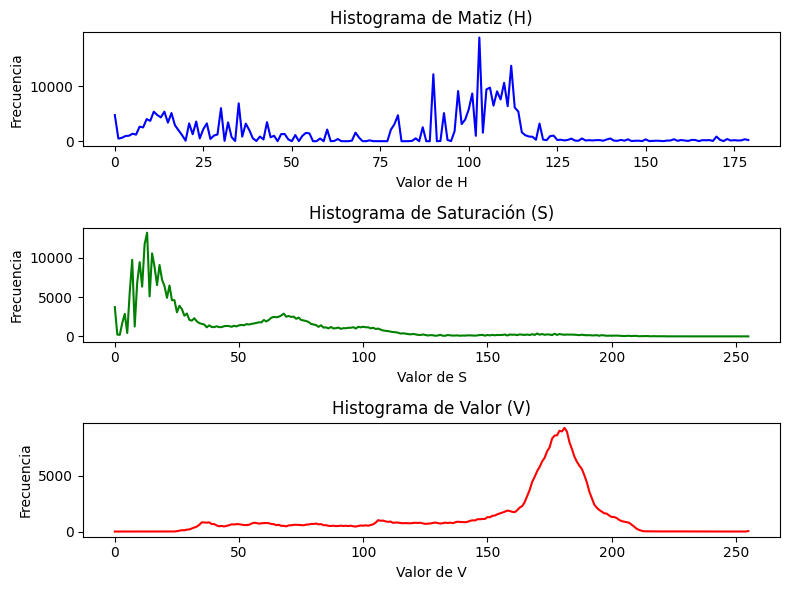

In [7]:
for imagen in imagenes:
    mostrar_histogramas_hsv(imagen)

## Segmentación de las imágenes y conclusiones
Primero se probó con HSV

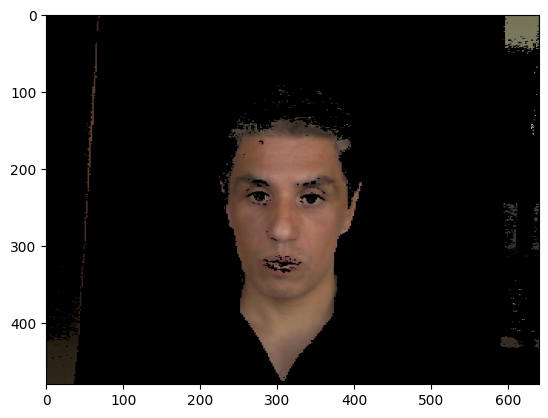

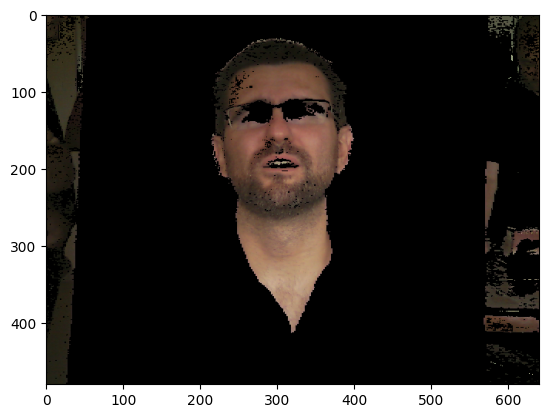

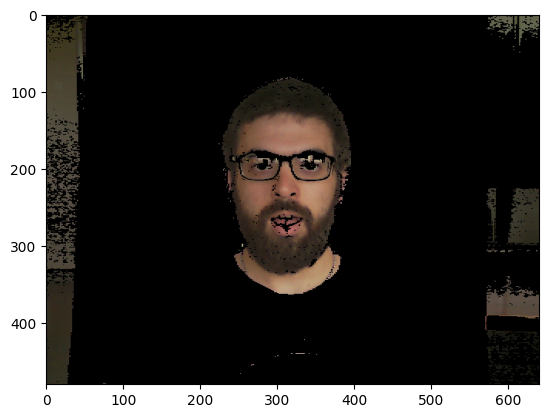

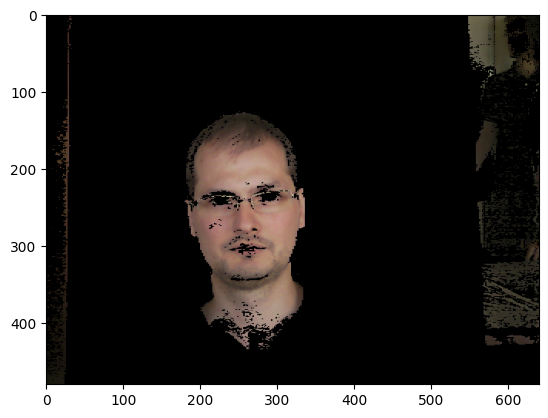

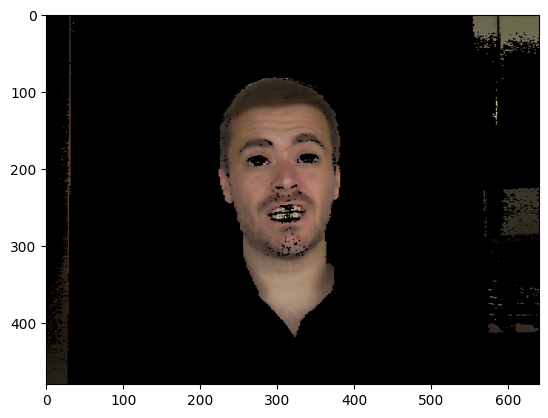

In [8]:
rango_hue = [0,45]
rango_saturation = [50,145]
for imagen in imagenes:
    segmentacion = segmentar_hsv(imagen, rango_hue, rango_saturation)
    segmentacion_RGB = cv.cvtColor(segmentacion,cv.COLOR_BGR2RGB)
    plt.imshow(segmentacion_RGB)
    plt.show()

Segmentación en RGB

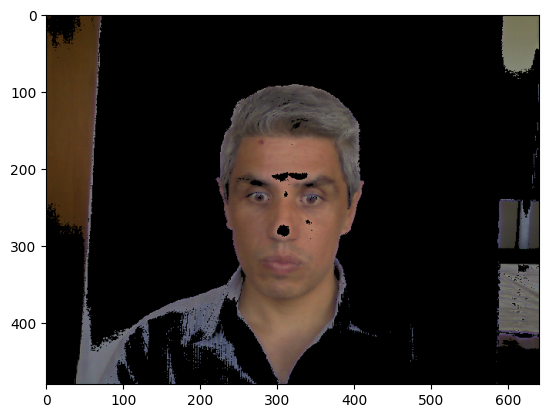

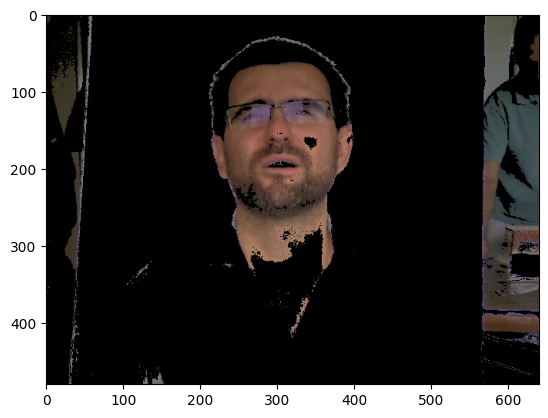

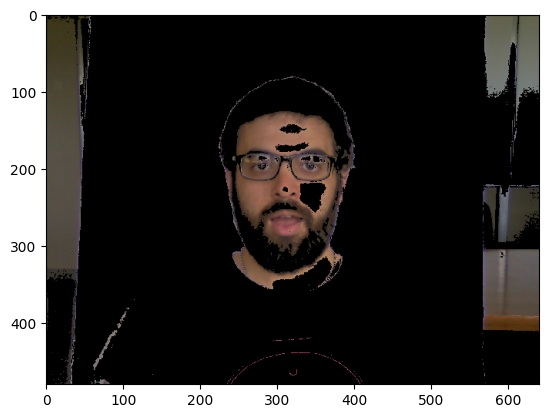

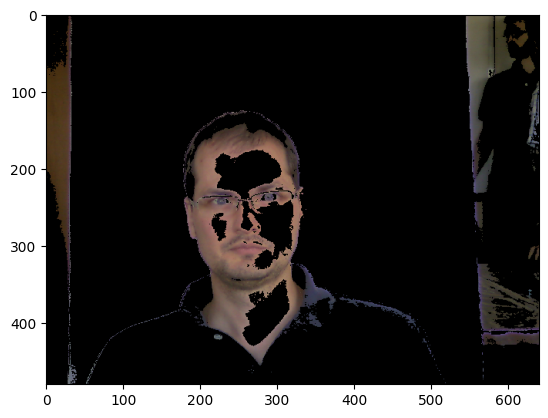

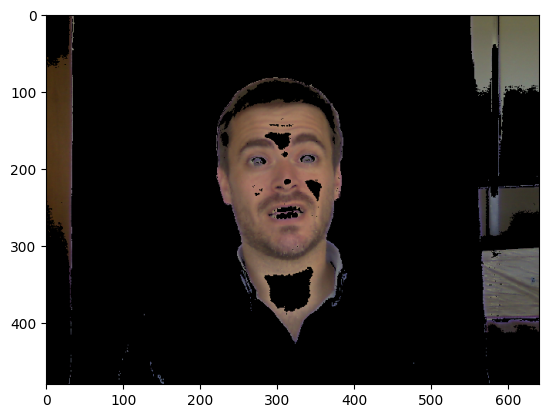

In [9]:
COLOR_ELEGIDO_RGB = [120,90,55]

centroide_rgb = np.array(COLOR_ELEGIDO_RGB)
radio_rgb = 80

for imagen in imagenes:
    imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    distancias = np.linalg.norm(imagen_rgb - centroide_rgb, axis=-1)
    mascara_rgb = np.where(distancias <= radio_rgb, 255, 0).astype(np.uint8) #Donde las distancias sean <= radio 1 sino 0)
    imagen_rgb_segmentada = cv.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_rgb)
    plt.imshow(imagen_rgb_segmentada)
    plt.show()

### ¿Que método le parece mejor? ¿Es posible obtener un conjunto de valores optimo para todas las imágenes? 
Nos parece mejor el método HSV, ya que nos permite concentrarnos mejor en la tonalidad de la piel y de ahí manejar la saturación para conseguir abarcar la piel lo mejor posible. Esto se debe a que en RGB, utilizando la esfera, no se pudo encontrar un único rango de valores (con el mismo radio) que satisfaga cada una de las componentes para segmentar bien la piel. Se puede encontrar un conjunto de valores lo suficientemente buenos como para segmentar, en gran parte, solo la piel de la imagen.
### ¿Es suficiente aplicar la segmentación sin métodos de pre-procesamiento (realce o filtrado)? 
Para obtener mejores resultados sería necesario aplicar algún tipo de pre-procesamiento, de forma tal que la piel se resalte de los demás objetos de la imagen.
### ¿Donde cree usted que están los mayores inconvenientes? 
Los mayores inconvenientes surgen en que el color de la piel se ve muy afectado por la luminosidad, es decir, solo modificando la posición de la fuente de luz en la imagen puede arruinar el método de segmentación que se está utilizando. Es por esto que es complicado definir un único rango de valores que abarque todos los posibles tonos de piel que deben segmentarse.
### ¿Que condiciones observa en la escena que son homogéneas y cuales heterogéneas? (distancia cámara-objeto, foco, iluminación ambiente, fondo de la escena, ubicación y pose del sujeto, color de piel, vestimenta y accesorios, etc.)
- Homogéneas:
    - Plano y posición de la cámara
    - Distancia cámara-objeto
    - Foco
    - Color de piel (si bien hay diferencias, no hay diferencias que marquen una tonalidad de piel completamente distinta)
    - Iluminación ambiente (parece ser la misma hora del día)
- Heterogéneas:
    - Pose del sujeto
    - Vestimenta
    - Accesorios
### A partir de estos análisis, ¿Podría usted generar una lista de consideraciones útiles para generar una base de datos de imágenes?
- Deben tomarse bajo la misma luminosidad, si es posible, usando luz artificial situada en algún punto concreto
- El fondo debe ser lo más homogéneo posible, apareciendo la mínima cantidad de objetos que pueden complejizar la segmentación
- Los sujetos deberían no usar accesorios que puedan complejizar la segmentación (como lentes o cadenas)
- Las imágenes deben ser tomadas con la misma cámara, misma posición de cámara y misma posición de los sujetos
- Y si los sujetos se encuentran dentro de la misma etnia disminuye la variabilidad de tonalidades de piel (no es aplicable en todos los casos)